In [7]:
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import OneHotEncoder
import warnings


warnings.filterwarnings("ignore")

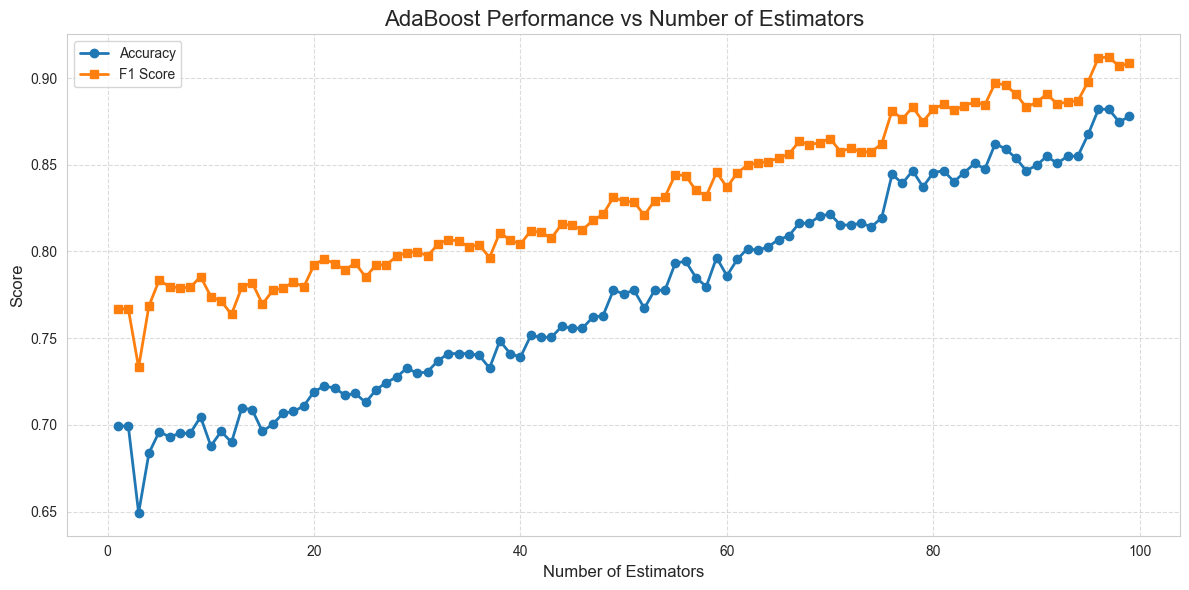

Best Accuracy: 0.8820 with 96 estimators
Best F1 Score: 0.9121 with 97 estimators


In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

MAX_N_ESTIMATOR = 100

COLUMNS = ["tl", "tm", "tr", "ml", "mm", "mr", "bl", "bm", "br", "class"]
ttt_df = pd.read_csv("../data/tictactoe/tic-tac-toe.data", header=None, names=COLUMNS)
ttt_df["class"] = ttt_df["class"] == "positive"
ttt_df.rename(columns={"class": "positive"}, inplace=True)


def evaluate_adaboost(X, y, n_estimators_range, cv=5):
    
    
    encoder = OneHotEncoder(handle_unknown="ignore", dtype=np.int8)
    encoder_df = pd.DataFrame(encoder.fit_transform(X).toarray())
    encoder_df.columns = encoder.get_feature_names_out()

    X = encoder_df

    accuracy_scores = []
    f1_scores = []
    
    for n_estimators in n_estimators_range:
        clf = AdaBoostClassifier(n_estimators=n_estimators, algorithm="SAMME")
        
        accuracy = cross_val_score(clf, X, y, cv=cv, scoring='accuracy').mean()
        f1 = cross_val_score(clf, X, y, cv=cv, scoring='f1').mean()
        
        accuracy_scores.append(accuracy)
        f1_scores.append(f1)
    
    return accuracy_scores, f1_scores

def plot_adaboost_performance(n_estimators_range, accuracy_scores, f1_scores, save_path=None):
    plt.figure(figsize=(12, 6))
    sns.set_style("whitegrid")

    plt.plot(n_estimators_range, accuracy_scores, marker='o', label='Accuracy', linewidth=2)
    plt.plot(n_estimators_range, f1_scores, marker='s', label='F1 Score', linewidth=2)

    plt.title("AdaBoost Performance vs Number of Estimators", fontsize=16)
    plt.xlabel("Number of Estimators", fontsize=12)
    plt.ylabel("Score", fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

    best_accuracy = max(accuracy_scores)
    best_accuracy_n = n_estimators_range[accuracy_scores.index(best_accuracy)]
    best_f1 = max(f1_scores)
    best_f1_n = n_estimators_range[f1_scores.index(best_f1)]

    print(f"Best Accuracy: {best_accuracy:.4f} with {best_accuracy_n} estimators")
    print(f"Best F1 Score: {best_f1:.4f} with {best_f1_n} estimators")

X = ttt_df.drop("positive", axis=1)
y = ttt_df["positive"]

n_estimators_range = range(1, MAX_N_ESTIMATOR)
accuracy_scores, f1_scores = evaluate_adaboost(X, y, n_estimators_range)

plot_adaboost_performance(n_estimators_range, accuracy_scores, f1_scores, 
                          save_path="../images/benchmark_adaboost_performance.png")



In [8]:
COLUMNS: list[str] = ["tl", "tm", "tr", "ml", "mm", "mr", "bl", "bm", "br", "class"]

# ttt is a acronym for tic tac toe
ttt_df: pd.DataFrame = pd.read_csv(
    "../data/tictactoe/tic-tac-toe.data", header=None, names=COLUMNS
)
ttt_df["class"] = ttt_df["class"] == "positive"
ttt_df.rename(columns={"class": "positive"}, inplace=True)
ttt_df.head(5)

,tl,tm,tr,ml,mm,mr,bl,bm,br,positive
0,x,x,x,x,o,o,x,o,o,True
1,x,x,x,x,o,o,o,x,o,True
2,x,x,x,x,o,o,o,o,x,True
3,x,x,x,x,o,o,o,b,b,True
4,x,x,x,x,o,o,b,o,b,True


Como a implementação de árvores de decisão da biblioteca *Scikit-Learn* é feita com foco para classificação de variável ordenáveis, foi necessário converter os dados para um formato *One Hot Encoding*, uma vez que os atributos da base de dados *Tic Tac Toe* são categóricos e sem uma ordem definida. 

In [9]:
# sklearn adaboost benchmarking

sklearn_adaboost: AdaBoostClassifier = AdaBoostClassifier(
    n_estimators=40, algorithm="SAMME"
)

encoder = OneHotEncoder(handle_unknown="ignore", dtype=np.int8)

cols_to_one_hot_encode: list[str] = ttt_df.columns.tolist()
cols_to_one_hot_encode.remove("positive")
encoder_df = pd.DataFrame(
    encoder.fit_transform(ttt_df[cols_to_one_hot_encode]).toarray()
)
encoder_df.columns = encoder.get_feature_names_out()
encoder_df["positive"] = ttt_df["positive"].copy()

sklearn_adaboost.fit(
    encoder_df.loc[:, encoder_df.columns != "positive"],
    encoder_df.loc[:, encoder_df.columns == "positive"],
)

AdaBoostClassifier(algorithm='SAMME', n_estimators=40)